# Challenge #3

This notebook contains the results of the Smarthelio challenge #3. It will be divided into 2 main parts:

    1 RISO fault detection 
    2 RISO fault automatic detection
    
For more details in regards this results, please contact the author of this notebook.

NOTE: all the results here contained, are for the to be used exclusively for the Smarthelio challenge.

## 1 RISO detection

### Imports:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
import sys
from os.path import join
%matplotlib notebook

In [2]:
# define raw data file
file = join(r"D:\repo\smarthelio\challenge\data\Challenge3.xlsx")
# define code path
sys.path.append(r"D:\repo\smarthelio\challenge\notebooks\code")

In [3]:
# import challenge 1 functions
import calcs

### Read raw data and create DF

In [4]:
# Weather data
weather_df = pd.read_excel(file, sheet_name="Weather_data")
weather_df = weather_df.rename(columns={"Ambient Temperature": "Tamb", "PV Module Temperature":"Tmod"})
weather_df = weather_df.set_index(pd.DatetimeIndex(weather_df.DateTime)).drop("DateTime",
                                                                   axis=1)
weather_df.head()

,Irradiance,Tamb,Tmod,Wind Speed
DateTime,,,,
2020-04-01 00:00:00,0.0,1.183105,1.295917,5.141826
2020-04-01 00:15:00,0.0,0.966491,1.074798,4.992640
2020-04-01 00:30:00,0.0,0.761855,0.864173,4.839744
2020-04-01 00:45:00,0.0,0.570503,0.666179,4.683251
2020-04-01 01:00:00,0.0,0.389767,0.480135,4.519306


In [5]:
# Inverter Data
inverter_df = pd.read_excel(file, sheet_name="Inverter_data")
inverter_df = inverter_df.rename(columns={" Time": "DateTime", "Inv-01 MPPT1 - Current DC (A)":"I1_MPPT1_A",
                                         "Inv-01 MPPT2 - Current DC (A)":"I1_MPPT2_A",
                                          "Inv-02 MPPT1 - Current DC (A)":"I2_MPPT1_A",
                                          "Inv-02 MPPT2 - Current DC (A)":"I2_MPPT2_A",
                                          "Inv-03 MPPT1 - Current DC (A)":"I3_MPPT1_A",
                                          "Inv-03 MPPT2 - Current DC (A)":"I3_MPPT2_A",
                                          "Inv-01 MPPT1 - Voltage DC (V)":"I1_MPPT1_V",
                                          "Inv-01 MPPT2 - Voltage DC (V)":"I1_MPPT2_V",
                                          "Inv-02 MPPT1 - Voltage DC (V)":"I2_MPPT1_V",
                                          "Inv-02 MPPT2 - Voltage DC (V)":"I2_MPPT2_V",
                                          "Inv-03 MPPT1 - Voltage DC (V)":"I3_MPPT1_V",
                                          "Inv-03 MPPT2 - Voltage DC (V)":"I3_MPPT2_V"})
inverter_df = inverter_df.set_index(pd.DatetimeIndex(inverter_df.DateTime)).drop("DateTime", axis=1)
inverter_df.head()

,I1_MPPT1_A,I1_MPPT2_A,I2_MPPT1_A,I2_MPPT2_A,I3_MPPT1_A,I3_MPPT2_A,I1_MPPT1_V,I1_MPPT2_V,I2_MPPT1_V,I2_MPPT2_V,I3_MPPT1_V,I3_MPPT2_V
DateTime,,,,,,,,,,,,
2020-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Joining the 2 DataFrames
df = pd.concat([weather_df, inverter_df], axis=1)
df.head()

,Irradiance,Tamb,Tmod,Wind Speed,I1_MPPT1_A,I1_MPPT2_A,I2_MPPT1_A,I2_MPPT2_A,I3_MPPT1_A,I3_MPPT2_A,I1_MPPT1_V,I1_MPPT2_V,I2_MPPT1_V,I2_MPPT2_V,I3_MPPT1_V,I3_MPPT2_V
DateTime,,,,,,,,,,,,,,,,
2020-04-01 00:00:00,0.0,1.183105,1.295917,5.141826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01 00:15:00,0.0,0.966491,1.074798,4.992640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01 00:30:00,0.0,0.761855,0.864173,4.839744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01 00:45:00,0.0,0.570503,0.666179,4.683251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01 01:00:00,0.0,0.389767,0.480135,4.519306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As suggested in the Challenge, one of the consequences of a RISO fault is intermitten operation on the inverter or late starting time. A RISO problem would be reflected as Open Circuit, means precense of Voltage and not Current while there is irradiance measurements.

If we normalize voltages, currents and irradiance by the max values then would be easier to compare them:

In [16]:
ndf = pd.DataFrame(index=df.index)
ndf["nIrr"] = df.Irradiance / df.Irradiance.max()
# Fiter for irradiance > 0 
ndf = ndf.loc[ndf.nIrr > 0]

n_inv = 3
n_mpp = 2
for i in range(1,n_inv+1):
    for m in range(1,n_mpp+1):
        # normilizing values
        col_name = "nI%i_MPPT%i_" %(i, m)
        inv_col = "I%i_MPPT%i_" %(i, m)
        ndf[col_name+"V"] = df[inv_col+"V"] / df[inv_col+"V"].max()
        ndf[col_name+"A"] = df[inv_col+"A"] / df[inv_col+"A"].max()
        # detection column
        col_name2 = "dI%i_MPPT%i" %(i, m)
        ndf[col_name2] = ndf.nIrr * 0
        # detection if there is Voltage and current = 0
        detected = list((ndf[col_name+"V"] > 0) & (ndf[col_name+"A"] == 0))
        if any(detected):
            print("Detected in Inverter %i and MPP %i" %(i, m))
            ndf.loc[ndf.index[detected], col_name2] = 1
ndf.head()

Detected in Inverter 2 and MPP 1
Detected in Inverter 2 and MPP 2
Detected in Inverter 3 and MPP 1
Detected in Inverter 3 and MPP 2


,nIrr,nI1_MPPT1_V,nI1_MPPT1_A,dI1_MPPT1,nI1_MPPT2_V,nI1_MPPT2_A,dI1_MPPT2,nI2_MPPT1_V,nI2_MPPT1_A,dI2_MPPT1,nI2_MPPT2_V,nI2_MPPT2_A,dI2_MPPT2,nI3_MPPT1_V,nI3_MPPT1_A,dI3_MPPT1,nI3_MPPT2_V,nI3_MPPT2_A,dI3_MPPT2
DateTime,,,,,,,,,,,,,,,,,,,
2020-04-01 07:00:00,0.000009,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2020-04-01 07:15:00,0.008867,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2020-04-01 07:30:00,0.032224,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2020-04-01 07:45:00,0.047993,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
2020-04-01 08:00:00,0.130302,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


<IPython.core.display.Javascript object>


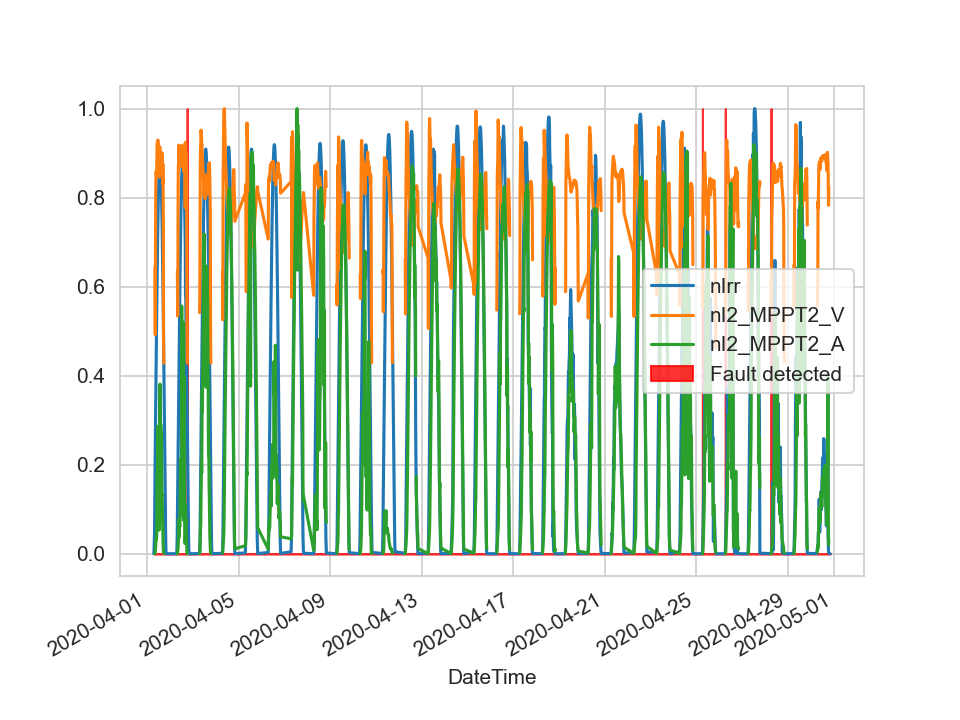

In [17]:
# Plotting detection
fig, axes = plt.subplots(dpi=150)
ndf.plot(y=["nIrr", "nI2_MPPT2_V", "nI2_MPPT2_A"], ax=axes)
axes.fill_between(ndf.index,
                     (1 * ndf.dI2_MPPT2.values),
                         alpha=0.8, label="Fault detected", color="red")
plt.legend()

<IPython.core.display.Javascript object>


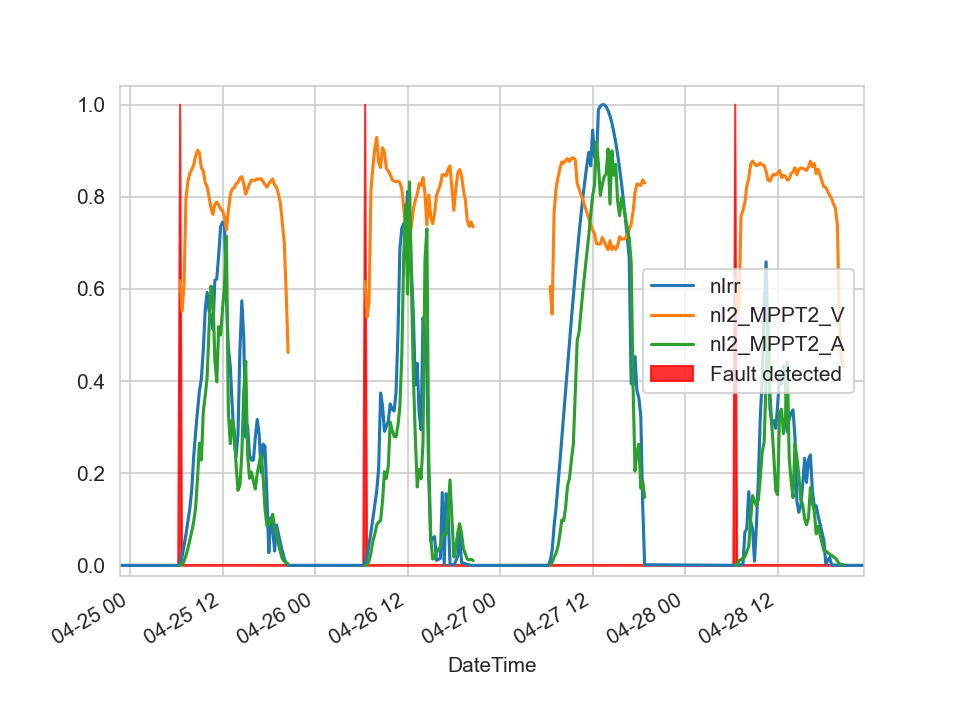

In [15]:
# zooming on the plot
# Plotting detection
fig, axes = plt.subplots(dpi=150)
ndf.plot(y=["nIrr", "nI2_MPPT2_V", "nI2_MPPT2_A"], ax=axes)
axes.fill_between(ndf.index,
                     (1 * ndf.dI2_MPPT2.values),
                         alpha=0.8, label="Fault detected", color="red")
plt.legend()

# Personal conclutions 

From The results above we can see that the fault has been detected in the Inverters 2 and 3, in both MPPs. The code above can be implemented in any system, it just need to know the number of inverters and the number of MPPs. One has to be carefult in using the same names for the colums DataFrame.

This is just one quick detection of the problem, it registered the late start of the inverters. To detect intermittance on the inverter a filter of Power = 0 can be implemented while Irradiance > 0.